In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Reading the dataset into a dataframe df.
df=pd.read_csv(r"C:\Users\hp\Desktop\student_performance_dataset.csv")
# Preprocessing dataset.
X=df.drop(columns=["Final_exam_score"])
y=df["Final_exam_score"]
X=pd.get_dummies(X,drop_first=True)
# Splitting dataset into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training the Random Forest Regressor model.
model=RandomForestRegressor(random_state=42)
# Hyperparameter Tuning using RandomizedSearchCV.
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)
random_search.fit(X_train,y_train)
best_rf = random_search.best_estimator_
print("Best Parameters Found:")
print(random_search.best_params_)
print(f"Mean Cross-Validation MSE: {-random_search.best_score_:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50

R2 Score: 0.16
Test MSE: 56.43


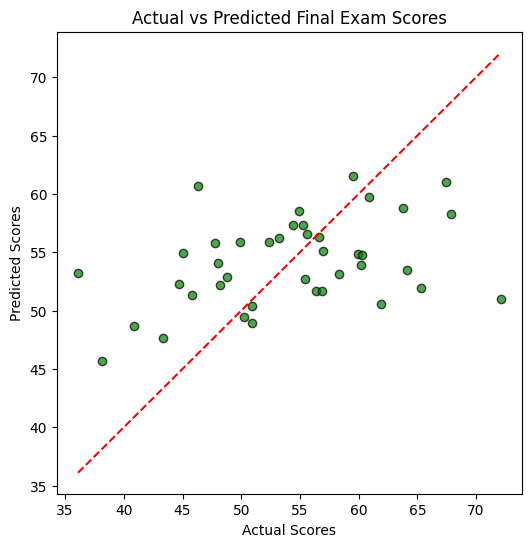

In [10]:
# Making predictions for the test set.
y_pred=best_rf.predict(X_test)
# Evaluating the model.
# Compute evaluation metrics.
score=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"R2 Score: {score:.2f}")
print(f"Test MSE: {mse:.2f}")
# Visual comparison.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7,color='green',edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--',color='red')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Final Exam Scores")
plt.show()